#e[PY]s: A Python Library for SciOps Analysis

##Define a few support things...

Grab my system username.

In [1]:
user_name = !whoami
user_name = user_name[0]

The following autoreloads packages and sub-packages before each call. This removes the need to restart the kernel after each change to the packages, in particular to epys.

In [2]:
%load_ext autoreload
%autoreload 2

Enable access to bash profile aliases

In [3]:
%%bash
. ~/.bash_profile

We may want to display some webpages in the notebook...

In [4]:
from IPython.display import HTML, SVG
from IPython import display

We can add widgets for interactivity

In [5]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
try:
    import seaborn as sns
    sns.set(color_codes=True)
except:
    pass

Set Matplotlib plot size

In [9]:
import matplotlib as mpl
%matplotlib inline

In [10]:
mpl.rcParams['figure.figsize'] = (20.0, 10.0)

##e[PY]s

What it says on the tin:

> "ePYs is a python library for the creation, manipulation, processing and plotting of the input and output files of ESA's Experiment Planning Software (EPS).

It's a "pulling-together" of many bits 'n' pieces of code I've written over the past 3 years or so...

The package can be installed directly from [PyPi](https://pypi.python.org/pypi/epys/). And the project is hosted on [Github](https://github.com/johnnycakes79/epys) with documenation on [ReadTheDocs](http://epys.rtfd.org).

It uses [Travis CI](https://travis-ci.org/johnnycakes79/epys) for continuous integration and [Coveralls](https://coveralls.io/r/johnnycakes79/epys) for test coverage checking... this is pretty low at the moment. 


It's functionality is spread across 6 modules, but what I will present here comes mainly from the **read** and **utils** modules.
* **draw** makes pretty orbit graphics
* **events** provides a series of time/date utilities
* **maps** does things with maps and images
* **orbit** processes mission analysis orbit files
* **read** reads EPS/MAPPS output into useable dataframes and/or arrays
* **utils** more utilities ...

##IPython

IPython provides extensions to the Python programming language that make working interactively convenient and efficient. 

These extensions are implemented in the IPython Kernel and are available in all of the IPython Frontends (Notebook, Terminal, Console and Qt Console) when running this kernel.

##IPython Notebook

The IPython Notebook is a web-based interactive computing system that enables users to author documents that include live code, narrative text, LaTeX equations, HTML, images and video. 

These documents are contain a full record of a computation and its results and can be shared on email, [Dropbox](http://dropbox.com), version control systems (like git/[GitHub](http://github.com)) or [nbviewer.ipython.org](http://nbviewer.ipython.org).

It's interactive documentation ... for free!

##Initial Import

In [11]:
import epys # pronounce e-pie-s

###Standard Library Packages used in this demo

The **[cPickle](https://docs.python.org/2/library/pickle.html)** module supports serialization and de-serialization of Python objects, providing an interface and functionality nearly identical to the pickle module.

In [12]:
import cPickle as pickle 

The **[datetime](https://docs.python.org/2/library/datetime.html?highlight=datetime#module-datetime)** module supplies classes for manipulating dates and times in both simple and complex ways.

In [13]:
from datetime import datetime as dt

###Heavy Lifting

**[Pandas](http://pandas.pydata.org)** is a software library written for the **Python** programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and **time series**.


In [14]:
import pandas as pd

Increase dataframe max width and height

In [15]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

**[NumPy](http://www.numpy.org/)** is an extension adding support for large, multi-dimensional arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays. </p>


In [16]:
import numpy as np

**[Plotly](https://plot.ly/)** is an online analytics and data visualization tool, providing online graphing, analytics, a Python command line, and stats tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

In [17]:
import plotly.plotly as py

In [18]:
import plotly.tools as tls
from plotly.graph_objs import Data, Layout, Figure, XAxis, YAxis, Scatter, Line, Legend

Setup plotly sign-in in **~/.plotly/.credentials**: [see the Plot.ly API Users Guide Step 6](http://nbviewer.ipython.org/github/plotly/python-user-guide/blob/master/s00_homepage/s00_homepage.ipynb#Step-6)

## EPS Simulation

The IPython Notebook has direct access to the command line and so EPS can be executed from within the notebook. 

This is handy - we can set the simluation parameters from within the notebook as well as capture and parse the output.

In [19]:
import os

We define a few data files to use later.

In [20]:
ls test/data

DS_latency_csv.out     data_rate_avg.out      modes_csv.out          power_budget.pwr
DS_transfers_csv.out   data_rate_avg_csv.out  module_states.out      state_params.out
actions.out            downlink_profile.brf   module_states_csv.out  timeline.out
conflicts.out          imagedatadump.dat      power_avg.out          timeline_csv.out
conflicts_csv.out      modes.out              power_avg_csv.out


In [21]:
power_avg_file = 'test/data/power_avg.out'
data_rate_avg_file = 'test/data/data_rate_avg.out'

power_budget_file= 'test/data/power_budget.pwr'
downlink_budget_file= 'test/data/downlink_profile.brf'

##Power Analysis

<p><b>epys</b> defines a number of table classes to deal with the main EPS/MAPPS input and output data formats, such as power and data downlink budgets and power usage and data production output files.</p>

<p>The base class of these tables is the <b>epstable</b> from which 2 more specific table classes are sub-classed: <b>powertable</b> and <b>datatable</b>. </p>

<p>Help is available within IPython or the IPython Notebook environment. </p>

In [22]:
help(epys.epstable)

Help on class epstable in module epys.read:

class epstable
 |  This is the base class for data tables in epys. Upon instantiation it is
 |  provided with a filename which is read into a header dictionary and a
 |  Pandas dataframe. The class has a number of methods for querying its
 |  characteristics, plotting its contents and merging other tables into it.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fname, columns=False)
 |      This constructor method initialises the epstable object.
 |      
 |      :param fname: input filename
 |      :type fname: str
 |      :param columns: user supplied list of column headings
 |      :type columns: list or tuple
 |      :returns: epstable object consisting of a header dictionary and Pandas dataframe
 |  
 |  head(self, n=False)
 |      This method returns the first n (default 5) rows of the dataframe
 |  
 |  iplot(self, selection=False, limits=False, title=False, x_title=False, x_range=False, y_title=False, y_range=False, showlegend

The docmentation is built into the code itself...

In [23]:
class epstable:
    """
    This is the base class for data tables in epys. Upon instantiation it is
    provided with a filename which is read into a header dictionary and a
    Pandas dataframe. The class has a number of methods for querying its
    characteristics, plotting its contents and merging other tables into it.
    """
    def __init__(self, fname, columns=False):
        """
        This constructor method initialises the epstable object.

        :param fname: input filename
        :type fname: str
        :param columns: user supplied list of column headings
        :type columns: list or tuple
        :returns: epstable object consisting of a header dictionary and Pandas dataframe
        """
        self.data, self.header = read(fname, meta=True, columns=columns)

And pretty docs are auto-generated and made available online: [readthdocs](http://epys.readthedocs.org/en/latest/index.html)

In [24]:
HTML('<iframe src=http://epys.readthedocs.org/en/latest/index.html width=100% height=500></iframe>')

###So let's read-in some data

 We set the <b>power usage file</b> earlier (though not on screen). Executing the variable name in a cell shows the file path and name.

In [25]:
power_avg_file

'test/data/power_avg.out'

Now we read it in by creating an instance of the **powertable** class.

In [26]:
power_usage = epys.powertable(power_avg_file)

12 redundant lines removed


Note the printed result of the import process...

![](images/remove_redundant_plot_3.png)

Output is at regular time intervals and at small timesteps, often, there is little change.

![](images/remove_redundant_plot_4.png)

As part of the read-in process <b>epys</b> checks for, and if possible removes, rendundant data points.

The resulting powertable consists of 2 parts
- a <b>dataframe</b> containing the data proper and 
- a <b>header</b> containing a dictionary of data parsed (as best can be done) from the commented lines at the start of the input file. 

We can examine the start or "head" of the dataframe using the head method.

In [27]:
power_usage.head()

,Total,ANTENNA,SSMM,BELA,ISA,MERMAG,MERTIS,MGNS,MORE,PHEBUS,SERENA,SIMBIOSYS-STC,SIMBIOSYS-HRIC,SIMBIOSYS-VIHI,MIXS-SIXS
Date,,,,,,,,,,,,,,,
2024-05-07,18.35,0,0,13.47,0.00,4.88,0.0,0,0,0,0.0,0.00,0,0.00,0.0
2024-05-08,163.34,0,0,43.90,12.87,4.88,12.9,5,0,0,37.2,6.18,0,11.21,29.2
2024-05-09,163.34,0,0,43.90,12.87,4.88,12.9,5,0,0,37.2,6.18,0,11.21,29.2
2024-05-10,148.64,0,0,43.90,12.87,4.88,9.0,5,0,24,2.4,6.18,0,11.21,29.2
2024-05-11,105.82,0,0,13.47,12.87,4.88,9.0,5,0,0,34.3,0.00,0,0.00,26.3


And we can look at the start of the header...

In [28]:
power_usage.header

{'CFG Template': 'v3.19',
 'EDF Template': 'v3.12',
 'EPS Version': 'v2.5.8',
 'EVF (ESOC FD)': 'DDID appendix-H v2.1',
 'EVF Template': 'v3.1',
 'File Contents': 'Average Power Values',
 'Generation Time': '25-November-2013_15',
 'ITL Template': 'v3.10',
 'Input CFG': 'eps_mac.cfg',
 'Input EDF': 'bepi.edf',
 'Input EVF': 'bepi_events_mpo_00012.evf',
 'Input Timeline': 'BC_SO10_FULL_________ITL_GEN_1A.itl',
 'MDB version': 'SISBCETB "ETB (1, 0, 38)"',
 'Output Filename': 'power_avg.out',
 'POR Definition': 'CRID issue C4',
 'Reference Date': datetime.datetime(2024, 5, 7, 0, 0),
 'experiments': ['ANTENNA',
  'SSMM',
  'BELA',
  'ISA',
  'MERMAG',
  'MERTIS',
  'MGNS',
  'MORE',
  'PHEBUS',
  'SERENA',
  'SIMBIOSYS-STC',
  'SIMBIOSYS-HRIC',
  'SIMBIOSYS-VIHI',
  'MIXS-SIXS'],
 'headings': ['Elapsed time',
  'Total',
  'ANTENNA',
  'SSMM',
  'BELA',
  'ISA',
  'MERMAG',
  'MERTIS',
  'MGNS',
  'MORE',
  'PHEBUS',
  'SERENA',
  'SIMBIOSYS-STC',
  'SIMBIOSYS-HRIC',
  'SIMBIOSYS-VIHI',
  'M

Or query some part of its dictionary object by passing it a key

In [29]:
power_usage.header['experiments']

['ANTENNA',
 'SSMM',
 'BELA',
 'ISA',
 'MERMAG',
 'MERTIS',
 'MGNS',
 'MORE',
 'PHEBUS',
 'SERENA',
 'SIMBIOSYS-STC',
 'SIMBIOSYS-HRIC',
 'SIMBIOSYS-VIHI',
 'MIXS-SIXS']

We now import the **power budget file** as an instance of the base epstable class. And manually assign the data column a heading.

In [30]:
power_budget = epys.epstable(power_budget_file)

In [31]:
power_budget.data.columns = ['Available']

In [32]:
power_budget.head()

,Available
date,
2024-03-24 05:00:00,333
2024-03-25 01:18:00,387
2024-03-25 22:18:00,431
2024-03-26 19:48:00,506
2024-03-27 18:18:00,562


Now we merge the power budget data into the power usage datatable using the <b>join</b> method. 

We specify the **in_place** flag to have the changes made directly in the power usage table rather than returning a new, updated instance of the table. 

For experimenting, the latter is probably the better option.

In [33]:
power_usage.join(power_budget, in_place=True)

In [34]:
power_usage.head()

,Available,Total,ANTENNA,SSMM,BELA,ISA,MERMAG,MERTIS,MGNS,MORE,PHEBUS,SERENA,SIMBIOSYS-STC,SIMBIOSYS-HRIC,SIMBIOSYS-VIHI,MIXS-SIXS
2024-05-07,387,18.35,0,0,13.47,0.00,4.88,0.0,0,0,0,0.0,0.00,0,0.00,0.0
2024-05-08,495,163.34,0,0,43.90,12.87,4.88,12.9,5,0,0,37.2,6.18,0,11.21,29.2
2024-05-09,495,163.34,0,0,43.90,12.87,4.88,12.9,5,0,0,37.2,6.18,0,11.21,29.2
2024-05-10,495,148.64,0,0,43.90,12.87,4.88,9.0,5,0,24,2.4,6.18,0,11.21,29.2
2024-05-11,495,105.82,0,0,13.47,12.87,4.88,9.0,5,0,0,34.3,0.00,0,0.00,26.3


###Plotting

The common python plotting library is **Matplotlib**. It is powerful and flexible and has for a long time been the main python plotting library.

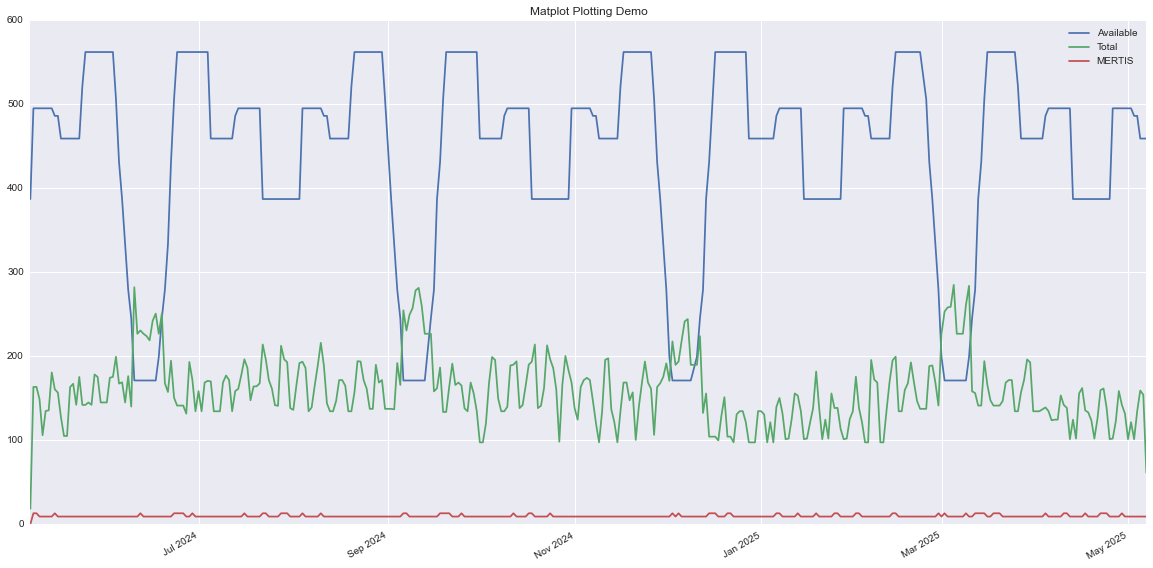

In [35]:
power_usage.data[['Available', 'Total', 'MERTIS']].plot(title='Matplot Plotting Demo', grid=True);

We can slice the data and spread the results across a number of subplots. 

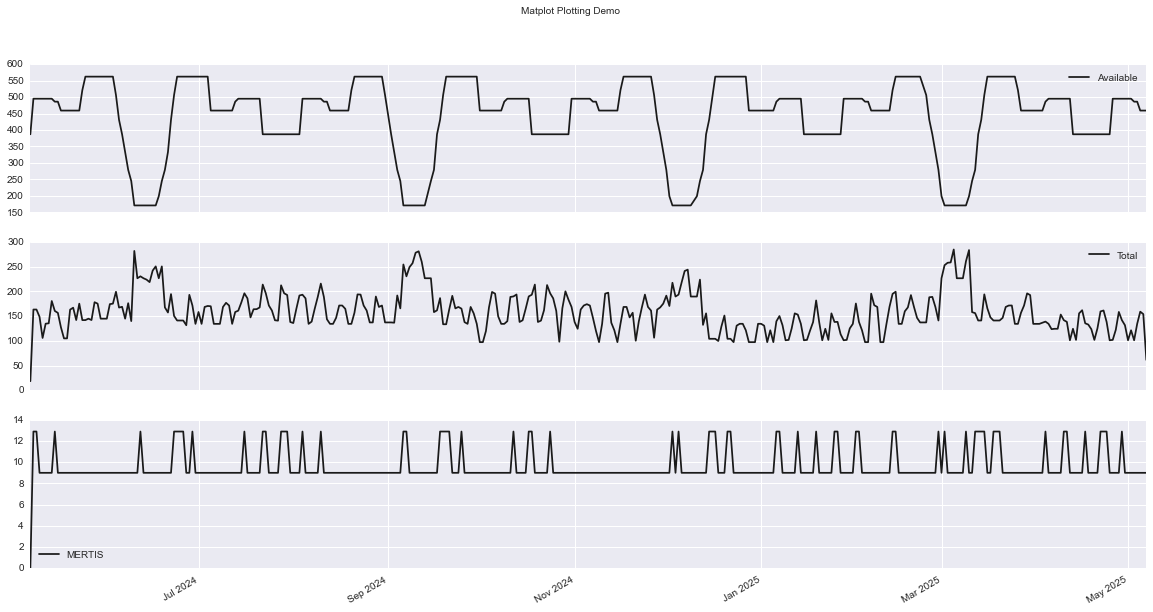

In [36]:
power_usage.data[['Available', 'Total', 'MERTIS']].plot(title='Matplot Plotting Demo', grid=True, subplots=True);

The **STATIC** possibilities are endless...

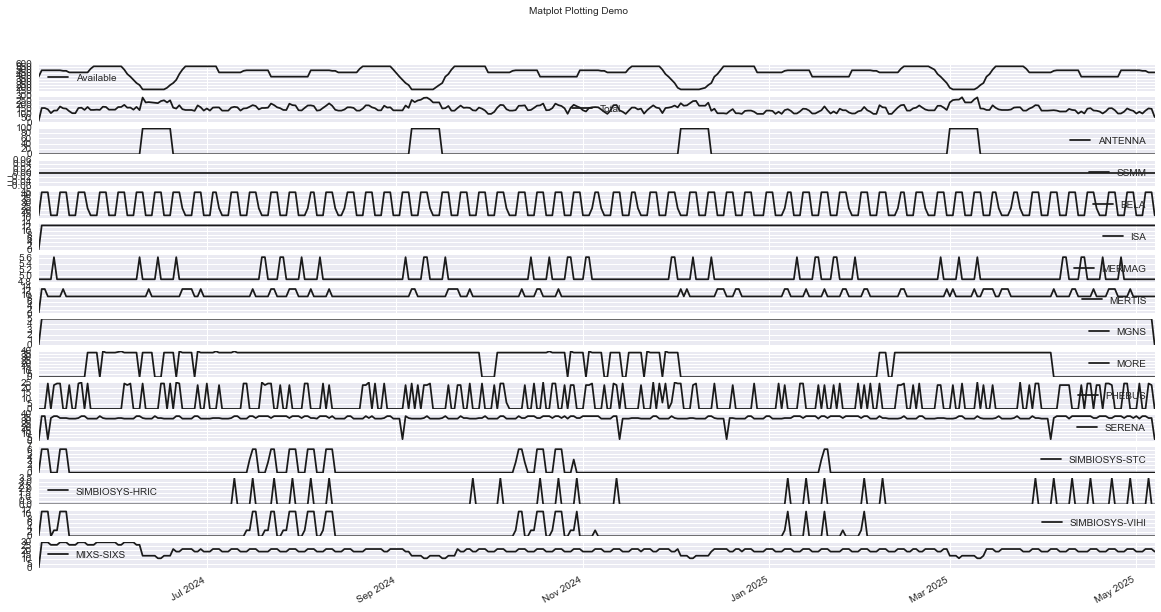

In [37]:
power_usage.data.plot(title='Matplot Plotting Demo', grid=True, subplots=True);

##Plot.ly

However, for increased interactivity, trace value flags and responsive zooming I'm using the Plotly online plotting library.

**epys** has a simple yet flexible plotting API. You just have to run the **iplot** method on the **datatable object**  you want to plot.

In [38]:
power_usage.iplot()

Plot.ly does have some limitiation in the number of points it can plot and work with. 

This is due mainly to the fact that the data is processed on the Plot.ly servers and they don't want people sending Gbits of data and crashing their system.

It can howerver deal with streaming data and that could be used to represent - as needed - larger data sets.

There are alternatives to Plot.ly. 

Bokeh is an upcoming challenger. Google it to be impressed...

But for what we are doing now, and compared to where we were before, **Plot.ly** is "nice".

##Prototyping

One of the great advantages of the Notebook is in prototyping code. 

You can start by running each command in a single, isolated cell; later group the commands together in the functions within the Notebook; and if everything works as you expect later move the functions into external importable libraries.

Define Perihelion Seasons based on the power restrictions. We do this manually here but it could be easily built from the power budget file.

In [39]:
# these ranges are 1 day (each end) bigger than the power restricted periods.
perihelia = {'1' : (dt( 2024,  6,  1, 19, 18), dt( 2024,  6, 25, 17, 18)),
                   '2' : (dt( 2024,  8, 28, 18, 18), dt( 2024,  9, 21, 16, 48)),
                   '3' : (dt( 2024, 11, 24, 17, 48), dt( 2024, 12, 18, 15, 48)),
                   '4' : (dt( 2025,  2, 21, 16, 48), dt( 2025,  3, 17, 15, 18)),
                   '5' : (dt( 2025,  5, 19, 16, 18), dt( 2025,  6,  9, 21, 18))}

Define a mini-function for plotting the perihelia only.

In [40]:
def periplot(perihelion):
    power_usage.iplot(limits = perihelia[str(perihelion)], 
                                  y_title='Power [W]', 
                                  title='MPO Available Power and Instrument Consumption<br>Perhelion {}'.format(str(perihelion)))

Here's a close-up of the power situation around **Perihelion 1: 2024-6-1, 19:18** _to_ **2024-6-25, 17:18**  

In [41]:
periplot(1)

In [42]:
power_usage.select(['Available', 'ANTENNA']).iplot(limits = perihelia['2'], y_title='Power [W]', title='MPO Available Power and Antenna Consumption<br>Perhelion 2')

Of course you can only plot seasons you have data for...

In [43]:
periplot(5)

OOOPS: Your requested range appears to be outside the range of the data set:
data set > 2024-05-07 00:00:00 to 2025-05-07 00:00:00
limits     > 2025-05-19 16:18:00 to 2025-06-09 21:18:00


##Save the Table Objects

In Python objects can be saved 'as-are' using something called "pickling".

In [46]:
! [ -d pickles ] || mkdir pickles

In [47]:
pickle.dump( power_usage, open( "pickles/power_usage.p", "wb" ) )

Pickling saves the object in a compressed  semi-binary format that can later be <b>quickly</b> re-loaded.

If we do a test to see how long this reload takes compared to the original reading-in of the file...

In [48]:
%timeit test_df = pickle.load( open( "pickles/power_usage.p", "rb" ) )

100 loops, best of 3: 15.9 ms per loop


In [49]:
%timeit test_df2 = epys.powertable(power_avg_file)

12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
12 redundant lines removed
1

While the difference for small, low-res simulation is small... we see the difference for these large, hi-res files is a factor of 25...

... and remember that the re-loaded pickle will include any post-processing done on the original dataframe, such as merging it with the power budget data.

## Data Rate Analysis

To read the average data rate file output by EPS we define an instance of the **datatable** class.

In [50]:
data_rate_avg = epys.datatable(data_rate_avg_file)

If we look at the head of the resulting dataframe we see some characteristics that were not present in the power table.

It has multi-level index. And an additional column showing the data volume per timestep has been generated for each instrument.

In [51]:
data_rate_avg.head()

ANTENNA                         BELA                          \
                Accum Downlink    Volume     Accum Download Memory  Upload   
                 Gbit   kbit/s      Gbit      Gbit   kbit/s   Gbit  kbit/s   
Date                                                                         
2024-05-07   0.000000        0  0.000000  0.000000        0      0   0.099   
2024-05-08   7.438953        0  7.438953  0.365467        0      0   9.888   
2024-05-09  16.418688        0  8.979735  0.737165        0      0   5.568   
2024-05-10  25.371039        0  8.952351  1.109660        0      0  12.405   
2024-05-11  34.208517        0  8.837478  1.479332        0      0   0.134   

                           ISA                                     MERMAG  \
              Volume     Accum Download Memory Upload    Volume     Accum   
                Gbit      Gbit   kbit/s   Gbit kbit/s      Gbit      Gbit   
Date                                                                        
2024-05-07  0.000000  0.000000        0      0  0.000  0.000000  0.000000   
2024-05-08  0.365467  0.140525        0      0  1.734  0.140525  0.030931   
2024-05-09  0.371697  0.285717        0      0  1.734  0.145192  0.061862   
2024-05-10  0.372495  0.430909        0      0  1.734  0.145192  0.092794   
2024-05-11  0.369672  0.575175        0      0  1.734  0.144266  0.123725   

                                                MERTIS                         \
           Download Memory Upload    Volume      Accum Download Memory Upload   
             kbit/s   Gbit kbit/s      Gbit       Gbit   kbit/s   Gbit kbit/s   
Date                                                                            
2024-05-07        0      0  0.358  0.000000   0.000000        0      0    0.0   
2024-05-08        0      0  0.358  0.030931   3.885424        0      0  118.0   
2024-05-09        0      0  0.358  0.030931   8.008112        0      0  240.0   
2024-05-10        0      0  0.358  0.030931  12.004162        0      0    0.4   
2024-05-11        0      0  0.358  0.030931  15.855224        0      0    0.4   

                          MGNS                                   MIXS-SIXS  \
              Volume     Accum Download Memory  Upload    Volume     Accum   
                Gbit      Gbit   kbit/s   Gbit  kbit/s      Gbit      Gbit   
Date                                                                         
2024-05-07  0.000000  0.000000        0      0  0.0000  0.000000  0.000000   
2024-05-08  3.885424  0.294034        0      0  3.4384  0.294034  0.787254   
2024-05-09  4.122688  0.591112        0      0  3.4384  0.297078  1.787013   
2024-05-10  3.996050  0.888190        0      0  3.4384  0.297078  2.577045   
2024-05-11  3.851062  1.185267        0      0  3.4384  0.297078  3.366793   

                                             MORE                         \
           Download Memory Upload    Volume Accum Download Memory Upload   
             kbit/s   Gbit kbit/s      Gbit  Gbit   kbit/s   Gbit kbit/s   
Date                                                                       
2024-05-07        0      0   0.00  0.000000     0        0      0      0   
2024-05-08        0      0   9.29  0.787254     0        0      0      0   
2024-05-09        0      0   9.29  0.999759     0        0      0      0   
2024-05-10        0      0   9.29  0.790032     0        0      0      0   
2024-05-11        0      0   9.00  0.789748     0        0      0      0   

                     PHEBUS                                      SERENA  \
           Volume     Accum Download Memory  Upload    Volume     Accum   
             Gbit      Gbit   kbit/s   Gbit  kbit/s      Gbit      Gbit   
Date                                                                      
2024-05-07      0  0.000000        0      0   0.000  0.000000  0.000000   
2024-05-08      0  0.241009        0      0   0.000  0.241009  0.408729   
2024-05-09      0  0.511508        0      0   0.0

This dataframe shows what was used by the instruments during the simulation but we would like to compare this to the available power.

So we read in the downlink budget file by defining an instance of the top-level **epstable** class.

In [52]:
downlink_budget = epys.epstable(downlink_budget_file)

If we look at the head of this downlink budget table we can see that the column headings are not very informative. 

This is because there is no standard heading format for the downlink budget file.

In [53]:
downlink_budget.head()

,1,2,3,4,5,6
date,,,,,,
2024-04-30,174.1,261.1,435.2,174.1,261.1,435.2
2024-05-01,174.1,208.9,382.9,174.1,261.1,435.2
2024-05-02,174.1,208.9,382.9,130.5,208.9,339.4
2024-05-03,174.1,208.9,382.9,174.1,208.9,382.9
2024-05-04,130.5,208.9,339.4,130.5,261.1,391.6


When we read in the file, the epstable read method created a header attribute as well as the data attribute seen above, and this we can examine.

In [54]:
downlink_budget.header

{'- APM Speed Limitations': 'No (0)',
 '- Bit Rate limitation': 'Yes (348.1204 kbps)',
 '- Ground Station Availability': '95%',
 '- Reaction Wheel Offloading': 'No (0)',
 '- Solar Activity': 'Normal (1)',
 '- Solar Conjunctions': 'Yes',
 '- Turbo 1/2 for high bitrate': 'No (0)',
 'Data Columns': 'CeX    CeK    CeB    MaX    MaK    MaB',
 'Factors Considered': '',
 'Factors NOT Considered': '',
 'len': 14}

This header, because it is not standard, is not as informative as that of the data rate table, but it does have a 'Data Columns' entry and this we can parse and use to build a mutli-level index for the downlink budget table.

In [55]:
channels = downlink_budget.header['Data Columns'].split()

In [56]:
arrays = [channels, ['Downlink' for x in channels], ['kbit/s' for x in channels]]

In [57]:
arrays

[['CeX', 'CeK', 'CeB', 'MaX', 'MaK', 'MaB'],
 ['Downlink', 'Downlink', 'Downlink', 'Downlink', 'Downlink', 'Downlink'],
 ['kbit/s', 'kbit/s', 'kbit/s', 'kbit/s', 'kbit/s', 'kbit/s']]

In [58]:
downlink_budget.data.columns = pd.MultiIndex.from_arrays(arrays, names=('channel', 'type', 'unit'))

We now have a budget dataframe with a mutli-level index.

In [59]:
downlink_budget.head()

channel,CeX,CeK,CeB,MaX,MaK,MaB
type,Downlink,Downlink,Downlink,Downlink,Downlink,Downlink
unit,kbit/s,kbit/s,kbit/s,kbit/s,kbit/s,kbit/s
date,,,,,,
2024-04-30,174.1,261.1,435.2,174.1,261.1,435.2
2024-05-01,174.1,208.9,382.9,174.1,261.1,435.2
2024-05-02,174.1,208.9,382.9,130.5,208.9,339.4
2024-05-03,174.1,208.9,382.9,174.1,208.9,382.9
2024-05-04,130.5,208.9,339.4,130.5,261.1,391.6


We now want to join this budget data to the data rate datatable and we do this with the **join** method on the **data_rate_avg** object.

In [60]:
data_rate_avg.join(downlink_budget, in_place=True)

In [61]:
data_rate_avg.head()

channel       ANTENNA                         BELA                          \
type            Accum Downlink    Volume     Accum Download Memory  Upload   
unit             Gbit   kbit/s      Gbit      Gbit   kbit/s   Gbit  kbit/s   
2024-05-07   0.000000        0  0.000000  0.000000        0      0   0.099   
2024-05-08   7.438953        0  7.438953  0.365467        0      0   9.888   
2024-05-09  16.418688        0  8.979735  0.737165        0      0   5.568   
2024-05-10  25.371039        0  8.952351  1.109660        0      0  12.405   
2024-05-11  34.208517        0  8.837478  1.479332        0      0   0.134   

channel                   CeB      CeK      CeX       ISA                  \
type          Volume Downlink Downlink Downlink     Accum Download Memory   
unit            Gbit   kbit/s   kbit/s   kbit/s      Gbit   kbit/s   Gbit   
2024-05-07  0.000000    304.6    174.1    130.5  0.000000        0      0   
2024-05-08  0.365467    304.6    174.1    130.5  0.140525        0      0   
2024-05-09  0.371697    304.6    174.1    130.5  0.285717        0      0   
2024-05-10  0.372495    304.6    174.1    130.5  0.430909        0      0   
2024-05-11  0.369672    261.1    130.5    130.5  0.575175        0      0   

channel                        MERMAG                                   \
type       Upload    Volume     Accum Download Memory Upload    Volume   
unit       kbit/s      Gbit      Gbit   kbit/s   Gbit kbit/s      Gbit   
2024-05-07  0.000  0.000000  0.000000        0      0  0.358  0.000000   
2024-05-08  1.734  0.140525  0.030931        0      0  0.358  0.030931   
2024-05-09  1.734  0.145192  0.061862        0      0  0.358  0.030931   
2024-05-10  1.734  0.145192  0.092794        0      0  0.358  0.030931   
2024-05-11  1.734  0.144266  0.123725        0      0  0.358  0.030931   

channel        MERTIS                                       MGNS           \
type            Accum Download Memory Upload    Volume     Accum Download   
unit             Gbit   kbit/s   Gbit kbit/s      Gbit      Gbit   kbit/s   
2024-05-07   0.000000        0      0    0.0  0.000000  0.000000        0   
2024-05-08   3.885424        0      0  118.0  3.885424  0.294034        0   
2024-05-09   8.008112        0      0  240.0  4.122688  0.591112        0   
2024-05-10  12.004162        0      0    0.4  3.996050  0.888190        0   
2024-05-11  15.855224        0      0    0.4  3.851062  1.185267        0   

channel                             MIXS-SIXS                         \
type       Memory  Upload    Volume     Accum Download Memory Upload   
unit         Gbit  kbit/s      Gbit      Gbit   kbit/s   Gbit kbit/s   
2024-05-07      0  0.0000  0.000000  0.000000        0      0   0.00   
2024-05-08      0  3.4384  0.294034  0.787254        0      0   9.29   
2024-05-09      0  3.4384  0.297078  1.787013        0      0   9.29   
2024-05-10      0  3.4384  0.297078  2.577045        0      0   9.29   
2024-05-11      0  3.4384  0.297078  3.366793        0      0   9.00   

channel               MORE                                    MaB      MaK  \
type          Volume Accum Download Memory Upload Volume Downlink Downlink   
unit            Gbit  Gbit   kbit/s   Gbit kbit/s   Gbit   kbit/s   kbit/s   
2024-05-07  0.000000     0        0      0      0      0    339.4    208.9   
2024-05-08  0.787254     0        0      0      0      0    304.6    174.1   
2024-05-09  0.999759     0        0      0      0      0    304.6    174.1   
2024-05-10  0.790032     0        0      0      0      0    278.5    174.1   
2024-05-11  0.789748     0        0      0      0      0    261.1    130.5   

channel         MaX    PHEBUS                                      SERENA  \
type       Downlink     Accum Download Memory  Upload    Volume     Accum   
unit         kbit/s      Gbit   kbit/s   Gbit  kbit/s      Gbit      Gbit   
2024-05-07    130.5  0.000000        0      0   0.000  0.000000  0.000000   
2024-05-08    130.5  0.241009        0

Save datatable to pickle object

In [62]:
pickle.dump( data_rate_avg, open( "pickles/data_rate_avg.p", "wb" ) )

Let's plot the data rate data... all of it. We'll turn off the legend because it's very big and not really needed as we will see.

In [63]:
data_rate_avg.iplot(showlegend=False)

# Slicing and Sub-Selection

You may not always want to examine or plot all of the data. 

In [219]:
data_rate_avg.head()

channel       ANTENNA                         BELA                          \
type            Accum Downlink    Volume     Accum Download Memory  Upload   
unit             Gbit   kbit/s      Gbit      Gbit   kbit/s   Gbit  kbit/s   
2024-05-07   0.000000        0  0.000000  0.000000        0      0   0.099   
2024-05-08   7.438953        0  7.438953  0.365467        0      0   9.888   
2024-05-09  16.418688        0  8.979735  0.737165        0      0   5.568   
2024-05-10  25.371039        0  8.952351  1.109660        0      0  12.405   
2024-05-11  34.208517        0  8.837478  1.479332        0      0   0.134   

channel                   CeB      CeK      CeX       ISA                  \
type          Volume Downlink Downlink Downlink     Accum Download Memory   
unit            Gbit   kbit/s   kbit/s   kbit/s      Gbit   kbit/s   Gbit   
2024-05-07  0.000000    304.6    174.1    130.5  0.000000        0      0   
2024-05-08  0.365467    304.6    174.1    130.5  0.140525        0      0   
2024-05-09  0.371697    304.6    174.1    130.5  0.285717        0      0   
2024-05-10  0.372495    304.6    174.1    130.5  0.430909        0      0   
2024-05-11  0.369672    261.1    130.5    130.5  0.575175        0      0   

channel                        MERMAG                                   \
type       Upload    Volume     Accum Download Memory Upload    Volume   
unit       kbit/s      Gbit      Gbit   kbit/s   Gbit kbit/s      Gbit   
2024-05-07  0.000  0.000000  0.000000        0      0  0.358  0.000000   
2024-05-08  1.734  0.140525  0.030931        0      0  0.358  0.030931   
2024-05-09  1.734  0.145192  0.061862        0      0  0.358  0.030931   
2024-05-10  1.734  0.145192  0.092794        0      0  0.358  0.030931   
2024-05-11  1.734  0.144266  0.123725        0      0  0.358  0.030931   

channel        MERTIS                                       MGNS           \
type            Accum Download Memory Upload    Volume     Accum Download   
unit             Gbit   kbit/s   Gbit kbit/s      Gbit      Gbit   kbit/s   
2024-05-07   0.000000        0      0    0.0  0.000000  0.000000        0   
2024-05-08   3.885424        0      0  118.0  3.885424  0.294034        0   
2024-05-09   8.008112        0      0  240.0  4.122688  0.591112        0   
2024-05-10  12.004162        0      0    0.4  3.996050  0.888190        0   
2024-05-11  15.855224        0      0    0.4  3.851062  1.185267        0   

channel                             MIXS-SIXS                         \
type       Memory  Upload    Volume     Accum Download Memory Upload   
unit         Gbit  kbit/s      Gbit      Gbit   kbit/s   Gbit kbit/s   
2024-05-07      0  0.0000  0.000000  0.000000        0      0   0.00   
2024-05-08      0  3.4384  0.294034  0.787254        0      0   9.29   
2024-05-09      0  3.4384  0.297078  1.787013        0      0   9.29   
2024-05-10      0  3.4384  0.297078  2.577045        0      0   9.29   
2024-05-11      0  3.4384  0.297078  3.366793        0      0   9.00   

channel               MORE                                    MaB      MaK  \
type          Volume Accum Download Memory Upload Volume Downlink Downlink   
unit            Gbit  Gbit   kbit/s   Gbit kbit/s   Gbit   kbit/s   kbit/s   
2024-05-07  0.000000     0        0      0      0      0    339.4    208.9   
2024-05-08  0.787254     0        0      0      0      0    304.6    174.1   
2024-05-09  0.999759     0        0      0      0      0    304.6    174.1   
2024-05-10  0.790032     0        0      0      0      0    278.5    174.1   
2024-05-11  0.789748     0        0      0      0      0    261.1    130.5   

channel         MaX    PHEBUS                                      SERENA  \
type       Downlink     Accum Download Memory  Upload    Volume     Accum   
unit         kbit/s      Gbit   kbit/s   Gbit  kbit/s      Gbit      Gbit   
2024-05-07    130.5  0.000000        0      0   0.000  0.000000  0.000000   
2024-05-08    130.5  0.241009        0

In [220]:
data_rate_avg.select(('CeX', 'CeK', 'BELA','MERTIS'), ('Volume', 'Downlink'), None).head()

channel,BELA,CeK,CeX,MERTIS
type,Volume,Downlink,Downlink,Volume
unit,Gbit,kbit/s,kbit/s,Gbit
2024-05-07,0.000000,174.1,130.5,0.000000
2024-05-08,0.365467,174.1,130.5,3.885424
2024-05-09,0.371697,174.1,130.5,4.122688
2024-05-10,0.372495,174.1,130.5,3.996050
2024-05-11,0.369672,130.5,130.5,3.851062


The slicing is "semi-clever"...

In [221]:
data_rate_avg.select(('CeX', 'CeK', 'BELA','MERTIS'), ('Volume', 'Downlink'), None).iplot(showlegend=False)

The software recognises the different data types (volume, rates) and splits the data across multiple axes as needed. 

More than 2 axes is also possible but I haven't seen a practical need for it ... yet!